In [23]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from pathlib import Path


In [24]:
def get_path(dir):
    project_dir = os.path.abspath('')
    image_dir = os.path.join(*dir)
    path = os.path.join(project_dir , image_dir)
    return path

path = get_path(["data", "raw"])
_, _, filenames = next(os.walk(path))
filenames = filter(lambda x : x.endswith('.csv'), filenames)
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(os.path.join(path, filename)))
df = pd.concat(dfs)
df.reset_index(inplace=True)
df.head()

,index,rating,url,text,tags,title,image_count,video_count,publ_time,author_name
0,0,243,https://pikabu.ru/story/evrotrip_na_dekabr_rim...,Идея большинства моих постов не попытаться про...,"['Дешевые билеты', 'Евротур', 'Длиннопост']","Евротрип на декабрь: Рим, Мальта, Венгрия и Ба...",6,0,2019-11-02 23:57:43+03:00,filrussia
1,1,4,https://pikabu.ru/story/tak_vyipem_zhe_7024542,В тему о новостях в кино. Брат решил повеселит...,"['Российское кино', 'Пенза', 'Смешной знак', '...",Так выпьем же,1,0,2019-11-02 23:56:31+03:00,IridaS
2,2,-4,https://pikabu.ru/story/kazhdyiy_vokalist_dolz...,"Вот сидишь ты такой, и не знаешь, что есть она...","['Божественно', 'Бесподобно', 'Вокал', 'От бог...",Каждый вокалист должен на Неё равняться!,0,1,2019-11-02 23:54:30+03:00,Quazy
3,3,11,https://pikabu.ru/story/ostorozhno_moshenniki_...,В связи с техническими неполадками не удалось ...,"['Роспотребнадзор', 'Защита прав потребителей'...","Осторожно, МОШЕННИКИ! В Казани и не только! ( ...",6,0,2019-11-02 23:53:58+03:00,n0len
4,4,27,https://pikabu.ru/story/khalyalnyie_kistochki_...,Сегодня в Леруа Мерлен. Без комментариев...,"['Халяль', 'Ремонт', 'Краски']",Халяльные кисточки для покраски,1,0,2019-11-02 23:52:54+03:00,Redtram91


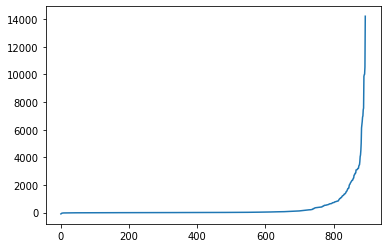

In [25]:
plt.plot(df.sort_values(by=['rating']).rating.values)
plt.show()

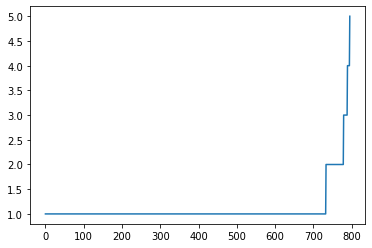

,index,rating,url,text,tags,title,image_count,video_count,publ_time
count,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000
mean,1.110553,1.110553,1.110553,0.804020,1.110553,1.110553,1.110553,1.110553,1.110553
std,0.428940,0.428940,0.428940,0.571247,0.428940,0.428940,0.428940,0.428940,0.428940
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [26]:
authors = df.groupby('author_name').count().sort_values(by=['url'])
plt.plot(authors.url.values)
plt.show()
authors.describe()

In [27]:
df.quantile(0.).rating, df.quantile(0.25).rating, df.quantile(0.5).rating, df.quantile(0.75).rating, df.quantile(1.).rating

(-92.0, 0.0, 13.0, 86.75, 14204.0)